In [9]:
import pandas as pd
import numpy as np
data = pd.read_csv("data_pre3.csv", encoding="gbk")#
data.head()

d:\softwares\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,url,id,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,...,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,tradeyear,trademon,tradeday
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,1464.0,106,415.0,31680,131.00,...,6,0.217,1.0,0.0,1.0,7,56021.0,2016,8,9
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,903.0,126,575.0,43436,132.38,...,6,0.667,1.0,1.0,0.0,7,71539.0,2016,7,28
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,1271.0,48,1030.0,52021,198.00,...,6,0.500,1.0,0.0,0.0,7,48160.0,2016,12,11
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,965.0,138,297.5,22202,134.00,...,6,0.273,1.0,0.0,0.0,6,51238.0,2016,9,30
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,927.0,286,392.0,48396,81.00,...,2,0.333,0.0,1.0,1.0,1,62588.0,2016,8,28


In [10]:
data_new=data.copy()
data_new["livingRoom"] = data_new["livingRoom"].apply(pd.to_numeric, errors='coerce')
data_new["drawingRoom"] = data_new["drawingRoom"].apply(pd.to_numeric, errors='coerce')
data_new["bathRoom"] = data_new["bathRoom"].apply(pd.to_numeric, errors='coerce')
for col in data_new.columns:
    print(col+' : '+ str(data_new[col].dtype))

url : object
id : object
Lng : float64
Lat : float64
Cid : int64
DOM : float64
followers : int64
totalPrice : float64
price : int64
square : float64
livingRoom : float64
drawingRoom : float64
kitchen : int64
bathRoom : float64
floor : float64
buildingType : float64
constructionTime : object
renovationCondition : int64
buildingStructure : int64
ladderRatio : float64
elevator : float64
fiveYearsProperty : float64
subway : float64
district : int64
communityAverage : float64
tradeyear : int64
trademon : int64
tradeday : int64


In [11]:
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import GradientBoostingRegressor

In [12]:
rf_params = [{
    'max_depth': [30], # 5 10 15 20
    'n_estimators': [120, 130], # 10 30 50 150
    'max_features': [6, 8], #1 2 4 
}]   

xgb_params = [{
    'max_depth': [9],  # 2-15 
    'min_child_weight':[2],
    'booster':['gbtree', 'dart'],
    'eta':[0.2, 0.3, 0.4]    
}] 

svr_params = [
#     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},   
#     {'kernel': ['poly'], 'C': [1], 'degree': [2, 3]},
#     {'kernel': ['rbf'], 'C': [1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001]}
    {'kernel': ['sigmoid'], 'C': [1, 10, 100, 1000]},   
    {'kernel': ['precomputed'], 'C': [1, 10, 100, 1000]},
]

dt_params =[{
    'max_depth':[10, 15, 20],  # 30, 40
    'splitter':['best'],  # 'random'
}]
    
gbr_params = [{
    'n_estimators': [500,100],
    'max_depth': [6,],
    'min_samples_split': [5,],
    'learning_rate': [0.01,],
    'loss': ['ls'],
}]
          
models = {
    'DT':ms.GridSearchCV(DecisionTreeRegressor(random_state=1), dt_params, cv=3),
    'RF': ms.GridSearchCV(RandomForestRegressor(random_state=1), rf_params, cv=3),
    'GBR': ms.GridSearchCV(GradientBoostingRegressor(random_state=1), gbr_params, cv=3),
    'XGBR': ms.GridSearchCV(XGBR(),xgb_params, cv=3),
#     'SVR':ms.GridSearchCV(SVR(),svr_params, cv=3),
}

In [13]:
import pickle
def fit_models(x_train,y_train):
    mfit = {model: models[model].fit(x_train, y_train) for model in models.keys()}
    b_params = {model: models[model].best_params_ for model in models.keys()}
    print(b_params)
    b_score = {model: models[model].best_score_ for model in models.keys()}
    print(b_score)


In [14]:
answer = pd.DataFrame()
def derive_positions(x_test):
    for model in models.keys():
        answer['pre'+model] = models[model].predict(x_test)

In [15]:
data_new.drop(["url", "id", "price","constructionTime"],axis=1, inplace=True)
data_new.isnull().sum()
data_new.shape
data_new=data_new.div(data_new.max())
data.drop(["url", "id", "price","constructionTime"],axis=1, inplace=True)

process_col=["DOM", "followers", "square", "livingRoom", "drawingRoom", "kitchen", "bathRoom", "floor", "renovationCondition", "buildingStructure", "elevator", "subway", "district", "tradeyear"]
#data=data[process_col]
data = data.sample(frac=1)
#data=data.div(data.max())

#x = data.copy()
x =data[process_col]
for nkey in process_col:
    x[nkey]=x[nkey].div(x[nkey].max())
#x.drop(['totalPrice'],axis=1, inplace=True)

y = data['totalPrice']
scale=y.max()
y=y.div(y.max())
x.shape,y.shape

C:\Users\hy109\AppData\Local\Temp/ipykernel_11924/1590087922.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[nkey]=x[nkey].div(x[nkey].max())


((318851, 14), (318851,))

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
#fit_models(x_train,y_train)
# f = open('rfc.pickle','rb')
# models = pickle.load(f)
# f.close()
f = open('rfc.pickle','wb')
pickle.dump(models,f)
f.close()
derive_positions(x_test)


{'DT': {'max_depth': 10, 'splitter': 'best'}, 'RF': {'max_depth': 30, 'max_features': 8, 'n_estimators': 130}, 'GBR': {'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 500}, 'XGBR': {'booster': 'dart', 'eta': 0.4, 'max_depth': 9, 'min_child_weight': 2}}
{'DT': 0.7504141077855374, 'RF': 0.8214850974851107, 'GBR': 0.8027784773140745, 'XGBR': 0.817130295486308}


In [17]:
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
scores = pd.DataFrame({'Model': [], 'RMSE': [], 'R2': []})
effect = pd.DataFrame(columns = ['model','MSE','MAE','RMSE','R2'])
i = 0
for k,v in models.items():
    y_predict = answer['pre'+k]
    MSE = mean_squared_error(y_test,y_predict)
    MAE = mean_absolute_error(y_test,y_predict)
    RMSE = np.sqrt(mean_squared_error(y_test,y_predict))  
    R2 = r2_score(y_test,y_predict)
    effect.loc[i] = [k,MSE,MAE,RMSE,R2]
    i += 1
    print(f"MSE:{MSE}MAE:{MAE}RMSE:{RMSE}R2:{R2}")
effect

MSE:4.129616363325893e-05MAE:0.0037318453587469173RMSE:0.006426209118388456R2:0.744277510761125
MSE:2.7302455834059305e-05MAE:0.0029641422129713774RMSE:0.0052251751964943055R2:0.8309321894831637
MSE:3.151691077731159e-05MAE:0.0034059204913864357RMSE:0.005613992409801744R2:0.804834585878998
MSE:2.6258826171377606e-05MAE:0.003036953947225098RMSE:0.005124336656717395R2:0.8373947649793909


,model,MSE,MAE,RMSE,R2
0,DT,0.000041,0.003732,0.006426,0.744278
1,RF,0.000027,0.002964,0.005225,0.830932
2,GBR,0.000032,0.003406,0.005614,0.804835
3,XGBR,0.000026,0.003037,0.005124,0.837395


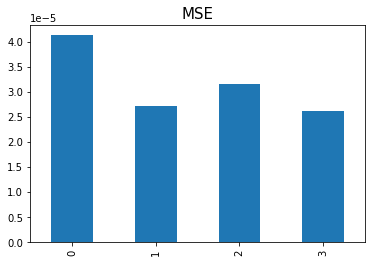

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
#effect.set_index(["model"], inplace=True)
ax = effect['MSE'].plot(kind="bar")
ax.set_title('MSE', fontsize=15)
plt.show()


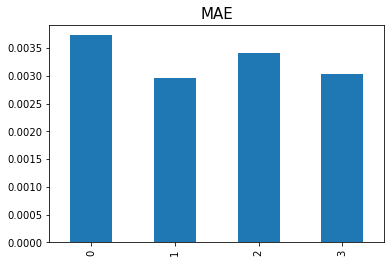

In [19]:
ax = effect['MAE'].plot(kind="bar")
ax.set_title('MAE', fontsize=15)
plt.show()

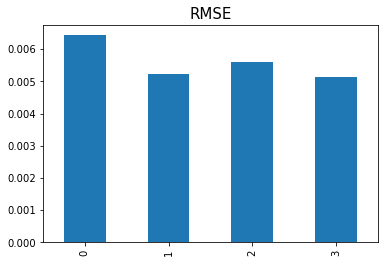

In [20]:
ax = effect['RMSE'].plot(kind="bar")
ax.set_title('RMSE', fontsize=15)
plt.show()

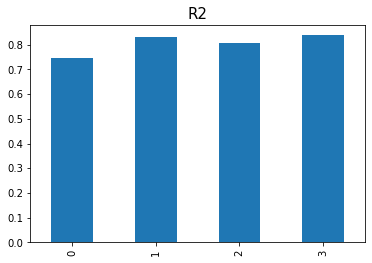

In [21]:
ax = effect['R2'].plot(kind="bar")
ax.set_title('R2', fontsize=15)
plt.show()